# Min-Conflicts

Extracted from [our textbook code](https://github.com/aimacode/aima-python)

And here is an [associated notebook](https://github.com/aimacode/aima-python/blob/master/csp.ipynb)

Here is a condensed version of the authors' min-conflicts implementation.

In [ ]:
import random

def min_conflicts(vars, domains, constraints, neighbors, max_steps=1000): 
    """Solve a CSP by stochastic hillclimbing on the number of conflicts."""
    # Generate a complete assignment for all vars (probably with conflicts)
    current = {}
    for var in vars:
        val = min_conflicts_value(var, current, domains, constraints, neighbors)
        current[var] = val
    # Now repeatedly choose a random conflicted variable and change it
    for i in range(max_steps):
        conflicted = conflicted_vars(current, vars, constraints, neighbors)
        if not conflicted:
            return (current, i)
        var = random.choice(conflicted)
        val = min_conflicts_value(var, current, domains, constraints, neighbors)
        current[var] = val
    return (None, None)

def min_conflicts_value(var, current, domains, constraints, neighbors):
    """Return the value that will give var the least number of conflicts.
    If there is a tie, choose at random."""
    return argmin_random_tie(domains[var],
                             lambda val: nconflicts(var, val, current, constraints, neighbors)) 

def conflicted_vars(current, vars, constraints, neighbors):
    "Return a list of variables in current assignment that are in conflict"
    return [var for var in vars
            if nconflicts(var, current[var], current, constraints, neighbors) > 0]

def nconflicts(var, val, assignment, constraints, neighbors):
    "Return the number of conflicts var=val has with other variables."
    # Subclasses may implement this more efficiently
    def conflict(var2):
        val2 = assignment.get(var2, None)
        return val2 != None and not constraints(var, val, var2, val2)
    return len(list(filter(conflict, neighbors[var])))

def argmin_random_tie(seq, fn):
    """Return an element with lowest fn(seq[i]) score; break ties at random.
    Thus, for all s,f: argmin_random_tie(s, f) in argmin_list(s, f)"""
    best_score = fn(seq[0])
    n = 0
    for x in seq:
        x_score = fn(x)
        if x_score < best_score:
            best, best_score = x, x_score; n = 1
        elif x_score == best_score:
            n += 1
            if random.randrange(n) == 0:
                    best = x
    return best

## Example: 8-queens

Now let's use this implementation to solve the [8-queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle).

Start by defining our variables.  Let's just name them 0 through 7, for the columns 0 through 7.

In [ ]:
vars = range(8)
list(vars)

Now, the domains for each variable are just rows 0 through 7.  We can use a dict comprehension for this.

In [ ]:
{key: range(8) for key in vars}

In [ ]:
domains = {key: range(8) for key in vars}
domains

The min-conflicts algorithm needs to know which variables each variable might have conflicts with.  Call these neighbors of each variable.

For the 8-queens problem, every queen could conflict with any other queen.

In [56]:
neighbors = {var: [v for v in vars if v != var] for var in vars}
neighbors

{0: [1, 2, 3, 4, 5, 6, 7],
 1: [0, 2, 3, 4, 5, 6, 7],
 2: [0, 1, 3, 4, 5, 6, 7],
 3: [0, 1, 2, 4, 5, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7],
 5: [0, 1, 2, 3, 4, 6, 7],
 6: [0, 1, 2, 3, 4, 5, 7],
 7: [0, 1, 2, 3, 4, 5, 6]}

How do we define the constraint that no two queens can be attacking each other?  We must check if two queens are on same row, same down diagonal, or same up diagonal. We must also check that they are different queens.  

Define function `constraints` that returns `True` if the given two queens satisfy the constraints, meaning they are not attaching each other. Recall that a queen is defined by the column it is in.

In [57]:
def constraints_ok(col1, row1, col2, row2):
    return (row1 != row2 and
            col1 + row1 != col2 + row2 and
            col1 - row1 != col2 - row2 and
            col1 != col2)

How would you test this function?

We also need a way to display a particular set of assignments to each variable, which, for the 8-queens problem, is just a view of the chess board with queens placed appropriately.  Let's use [unicode characters](https://en.wikipedia.org/wiki/Chess_symbols_in_Unicode).

In [58]:
print('\u265b')

♛


In [59]:
def display(assignment):
    for row in range(8):
        for col in range(8):
            if assignment[col] == row:
                print('\u265b', end='')
            else:
                print('--', end='')
        print()

In [60]:
display({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7:7})

♛--------------
--♛------------
----♛----------
------♛--------
--------♛------
----------♛----
------------♛--
--------------♛


In [61]:
vars, domains, neighbors

(range(0, 8),
 {0: range(0, 8),
  1: range(0, 8),
  2: range(0, 8),
  3: range(0, 8),
  4: range(0, 8),
  5: range(0, 8),
  6: range(0, 8),
  7: range(0, 8)},
 {0: [1, 2, 3, 4, 5, 6, 7],
  1: [0, 2, 3, 4, 5, 6, 7],
  2: [0, 1, 3, 4, 5, 6, 7],
  3: [0, 1, 2, 4, 5, 6, 7],
  4: [0, 1, 2, 3, 5, 6, 7],
  5: [0, 1, 2, 3, 4, 6, 7],
  6: [0, 1, 2, 3, 4, 5, 7],
  7: [0, 1, 2, 3, 4, 5, 6]})

In [63]:
min_conflicts(vars, domains, constraints_ok, neighbors)

({0: 3, 1: 5, 2: 0, 3: 4, 4: 1, 5: 7, 6: 2, 7: 6}, 5)

In [65]:
solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)

In [66]:
display(solution)

------♛--------
--♛------------
--------------♛
----------♛----
♛--------------
----♛----------
--------♛------
------------♛--


In [88]:
solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors, max_steps=2000)
print('Solution found in', steps, 'steps')
display(solution)

Solution found in None steps


TypeError: 'NoneType' object is not subscriptable

In [90]:
for i in range(10):
    solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)
    print(steps)

2
8
70
None
7
0
0
1
40
47


In [91]:
import matplotlib.pyplot as plt

2 tries did not find solution within maximum number of steps of 10000


Text(0, 0.5, 'Number of Runs')

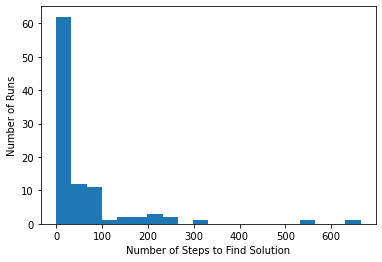

In [95]:
max_steps = 10000
bunch = [min_conflicts(vars, domains, constraints_ok, neighbors, max_steps) for i in range(100)]
steps = [b[1] for b in bunch]
print(len([s for s in steps if s is None]),'tries did not find solution within maximum number of steps of', max_steps)
plt.hist([s for s in steps if s is not None], 20)
plt.xlabel('Number of Steps to Find Solution')
plt.ylabel('Number of Runs')

## Activity Selection Problem

Activities have start and finish times and have a priority.  Select a subset of activities that do not overlap in time for which the sum of the activities' priorities is maximized.

This is a constraint optimization problem (COP).

In [174]:
start = [2, 6, 8, 5, 10, 12, 7]
finish= [5, 7, 10, 8, 15, 13, 9]
priority = [5, 3, 6, 3, 20, 8, 4]

Variables are just integer indices for each task.  Values are 1 or 0 signifying that an activity is included or not included in the subset.

In [175]:
n_activities = len(start)
vars = range(n_activities)
domains = {v: [0, 1] for v in vars}
vars, domains

(range(0, 7),
 {0: [0, 1], 1: [0, 1], 2: [0, 1], 3: [0, 1], 4: [0, 1], 5: [0, 1], 6: [0, 1]})

In [176]:
domains

{0: [0, 1], 1: [0, 1], 2: [0, 1], 3: [0, 1], 4: [0, 1], 5: [0, 1], 6: [0, 1]}

Neighbors for an activity are all other activities that are not compatible with it, meaning that they overlap in time.

In [177]:
def overlap_lists(a, b):
    return [i for i in list(a) if i in list(b)] != []

In [178]:
overlap_lists(range(1, 5), range(6, 10))

False

In [179]:
overlap_lists(range(1, 6), range(4, 10))

True

In [180]:
def overlap(i, j):
    return overlap_lists(range(start[i], finish[i]+1), range(start[j], finish[j]+1))

In [181]:
start, finish

([2, 6, 8, 5, 10, 12, 7], [5, 7, 10, 8, 15, 13, 9])

In [182]:
overlap(0, 1)

False

In [183]:
overlap(4, 5)

True

In [184]:
neighbors = {v: [v2 for v2 in range(n_activities) 
                 if v2 != v and overlap(v, v2)]  for v in vars}

In [185]:
activity1, value1, activity2, valueneighbors

{0: [3],
 1: [3, 6],
 2: [3, 4, 6],
 3: [0, 1, 2, 6],
 4: [2, 5],
 5: [4],
 6: [1, 2, 3]}

In [186]:
def constraints_ok(activity1, value1, activity2, value2):
    return value1 == 0 or value2 == 0

In [187]:
import numpy as np

def print_activities(s, f, priorities, whichOnes=None):
    if whichOnes is None:
        whichOnes = range(len(s))
    whichOnes = np.array(whichOnes)
    n = len(whichOnes)
    print(('{:5d} '*n).format(*whichOnes))
    print('-'*6*n)
    s = np.array(s)
    f = np.array(f)
    p = np.array(priorities)
    print(('{:5d} '*n).format(*s[whichOnes]))
    print(('{:5d} '*n).format(*f[whichOnes]))
    print(('{:5d} '*n).format(*p[whichOnes]))

In [188]:
start, finish, priority

([2, 6, 8, 5, 10, 12, 7], [5, 7, 10, 8, 15, 13, 9], [5, 3, 6, 3, 20, 8, 4])

In [189]:
print_activities(start, finish, priority)

    0     1     2     3     4     5     6 
------------------------------------------
    2     6     8     5    10    12     7 
    5     7    10     8    15    13     9 
    5     3     6     3    20     8     4 


In [190]:
solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)
solution

{0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0}

In [191]:
solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)
print(f'Took {steps} steps.')
activities =  [k for k, v in solution.items() if v == 1]  # extract activities whose value is 1 (meaning selected)
print('Solution is', activities)
print_activities(start, finish, priority, activities)

Took 0 steps.
Solution is [3, 5]
    3     5 
------------
    5    12 
    8    13 
    3     8 


In [202]:
best_so_far = (0, [])
for i in range(10000):
    solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)
    activities = [k for k,v in solution.items() if v == 1]
    sum_priorities = sum([priority[i] for i in activities])
    if sum_priorities > best_so_far[0]:
        best_so_far = (sum_priorities, activities)
        print('Iteration',i, best_so_far)
print('Final result', best_so_far)
print()
print_activities(start, finish, priority, best_so_far[1])
print('Sum of priorities', best_so_far[0])

Iteration 0 (25, [0, 4])
Iteration 12 (28, [0, 1, 4])
Iteration 51 (29, [0, 4, 6])
Final result (29, [0, 4, 6])

    0     4     6 
------------------
    2    10     7 
    5    15     9 
    5    20     4 
Sum of priorities 29


In [203]:
i

9999

Can you use our `min_conflicts` implementation to solve a cryptoarithmetic puzzle, such as
```
         T W O
       + T W O
       -------
       F O U R
```

In [209]:
vars = ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3']
domains = {letter: range(0,10) for letter in vars}
domains['C1'] = [0, 1]
domains['C2'] = [0, 1]
domains['C3'] = [0, 1]
domains

{'T': range(0, 10),
 'W': range(0, 10),
 'O': range(0, 10),
 'F': range(0, 10),
 'U': range(0, 10),
 'R': range(0, 10),
 'C1': [0, 1],
 'C2': [0, 1],
 'C3': [0, 1]}

In [217]:
vars

['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3']

In [210]:
neighbors = {v: vars  for v in vars}
neighbors

{'T': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'W': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'O': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'F': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'U': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'R': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'C1': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'C2': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3'],
 'C3': ['T', 'W', 'O', 'F', 'U', 'R', 'C1', 'C2', 'C3']}

In [214]:
def constraints_ok(a):
    T = a['T']
    W = a['W']
    O = a['O']
    F = a['F']
    U = a['U']
    R = a['R']
    C1 = a['C1']
    C2 = a['C2']
    C3 = a['C3']
    return (O + O == R + 10 * C1) and \
            (C1 + W + W == U + 10 * C2) and \
            (C2 + T + T == O + 10 * C3) and \
            (C3 == F)

In [ ]:
solution, steps = min_conflicts(vars, domains, constraints_ok, neighbors)